In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities"
sys.path.append(path)
import plot_settings

In [2]:
data = np.genfromtxt(r'C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Arguments\ML\SN_v0\mu_z.txt', delimiter=' ')

In [3]:
z_sample  = data[:, 0]
mu_sample = data[:, 1]
dmu       = data[:, 2]

In [4]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import mean_squared_error

## Ridge Regularization

In [ ]:
from sklearn.kernel_ridge import KernelRidge

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
z_train, z_test, mu_train, mu_test = train_test_split(z_sample, mu_sample, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
z_train_scaled = scaler.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler.transform(z_test.reshape(-1, 1))

In [ ]:
model = KernelRidge(kernel='rbf', gamma=0.55, alpha=1e-2)  # RBF = Gaussian kernel
model.fit(z_train_scaled.reshape((-1,1)), mu_train)

KernelRidge(alpha=0.01, gamma=0.55, kernel='rbf')

In [23]:
mu_pred = model.predict(z_test_scaled)

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
print("MSE:", mean_squared_error(mu_test, mu_pred))

MSE: 0.8201689136574029


In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [1e-5, 1e-3, 1e-1], 'gamma': np.linspace(0.01, 0.1, 20)}
grid = GridSearchCV(KernelRidge(kernel='rbf'), param_grid, cv=5)
grid.fit(z_train_scaled, mu_train)
print("Best params:", grid.best_params_)

Best params: {'alpha': 1e-05, 'gamma': np.float64(0.019473684210526317)}


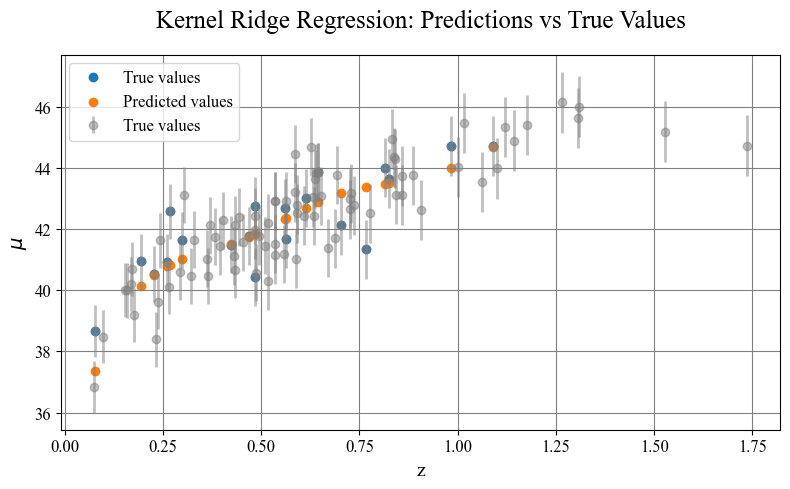

In [37]:
import matplotlib.pyplot as plt

# Predict using scaled test data
mu_pred = model.predict(z_test_scaled)

# Plot predicted vs true values
plt.figure(figsize=(8, 5))
plt.errorbar(z_sample, mu_sample, dmu, fmt='o', color='gray', label="True values", alpha=0.5)
plt.scatter(z_test, mu_test, label="True values", alpha=1)
plt.scatter(z_test, mu_pred, label="Predicted values", alpha=1)
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.legend()
plt.title("Kernel Ridge Regression: Predictions vs True Values")
plt.grid(True)
plt.show()
